# P3

## Autocorrelation

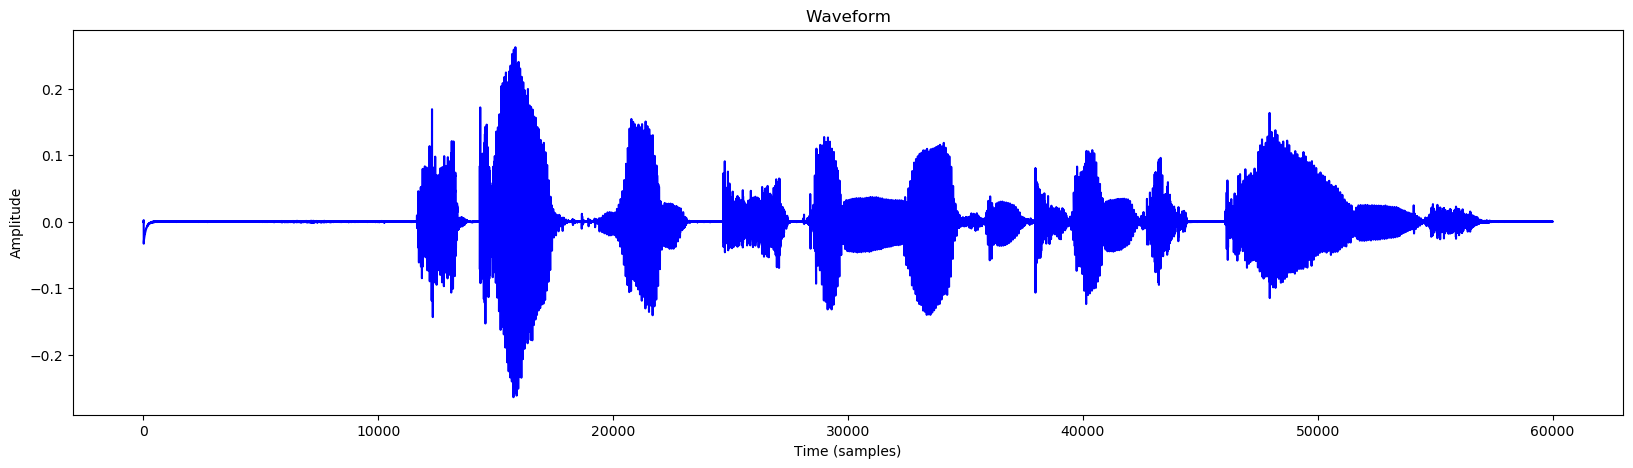

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf

# CONSTANT DEFINITION
filename = "../prueba.wav"
FRAME_LEN = 30/1000     # s
FRAME_SHIFT = 15/1000   # s
MIN_F0 = 20             # Hz
MAX_F0 = 1000            # Hz



wav_file, sample_rate = sf.read(filename)

plt.figure(figsize=(20, 5))
plt.plot(wav_file, color='b')
plt.title('Waveform')
plt.ylabel('Amplitude')
plt.xlabel('Time (samples)')
plt.show()

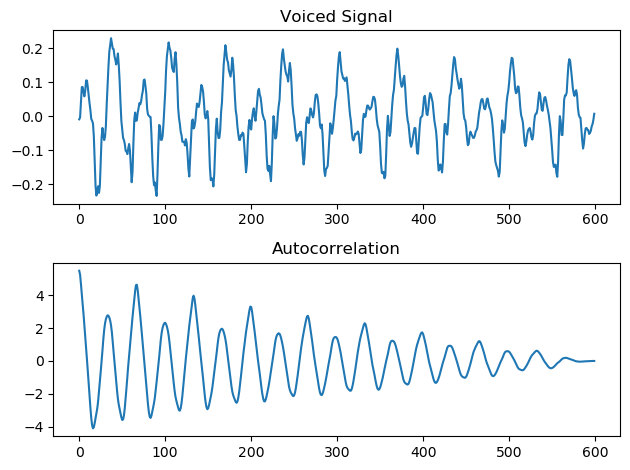

In [18]:
voiced_timestpamp = 16000

segment_samples = round(sample_rate*FRAME_LEN)
voiced_signal = wav_file[voiced_timestpamp:voiced_timestpamp+segment_samples]
voiced_signal_autocorr = np.correlate(voiced_signal, voiced_signal, mode='full')

# Keep only the second half of the autocorrelation
voiced_signal_autocorr = voiced_signal_autocorr[voiced_signal_autocorr.size // 2:]

plt.figure()

plt.subplot(2, 1, 1)
plt.plot(voiced_signal)
plt.title('Voiced Signal')

plt.subplot(2, 1, 2)
plt.plot(voiced_signal_autocorr)
plt.title('Autocorrelation')

plt.tight_layout()
plt.show()

## Voiced sound

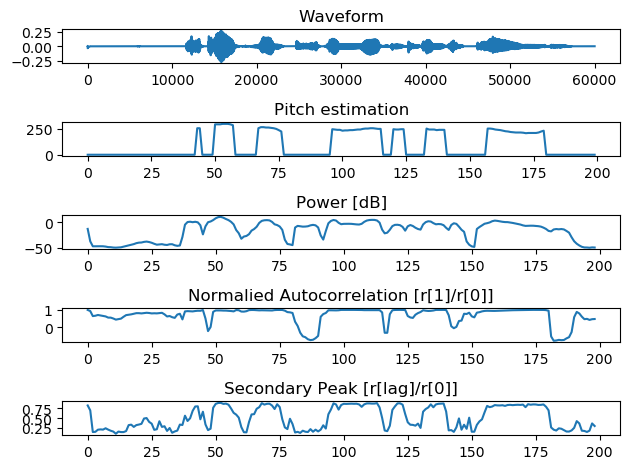

In [22]:
from numpy import loadtxt

n_pitch_min = round(sample_rate/MAX_F0)
step = round(sample_rate*FRAME_SHIFT)

pitch = loadtxt('../prueba.f0')
r_lag = []
r1 = []
power = []
for i in range(0, len(wav_file) - segment_samples + 1, step):
    signal = wav_file[i:i+segment_samples]
    autocorrelation = np.correlate(signal, signal, mode='full')
    autocorrelation = autocorrelation[autocorrelation.size // 2:] # Keep only the second half of the autocorrelation

    pow = autocorrelation[0]
    pow1 = autocorrelation[1]
    pow_lag = max(autocorrelation[n_pitch_min:])

    power.append(pow)
    r1.append(pow1/pow)
    r_lag.append(pow_lag/pow)


power_dB = 10 * np.log10(power)

plt.figure()

plt.subplot(5, 1, 1)
plt.plot(wav_file)
plt.title('Waveform')

plt.subplot(5, 1, 2)
plt.plot(pitch)
plt.title('Pitch estimation')

plt.subplot(5, 1, 3)
plt.plot(power_dB)
plt.title('Power [dB]')

plt.subplot(5, 1, 4)
plt.plot(r1)
plt.title('Normalied Autocorrelation [r[1]/r[0]]')

plt.subplot(5, 1, 5)
plt.plot(r_lag)
plt.title('Secondary Peak [r[lag]/r[0]]')

plt.tight_layout()
plt.show()

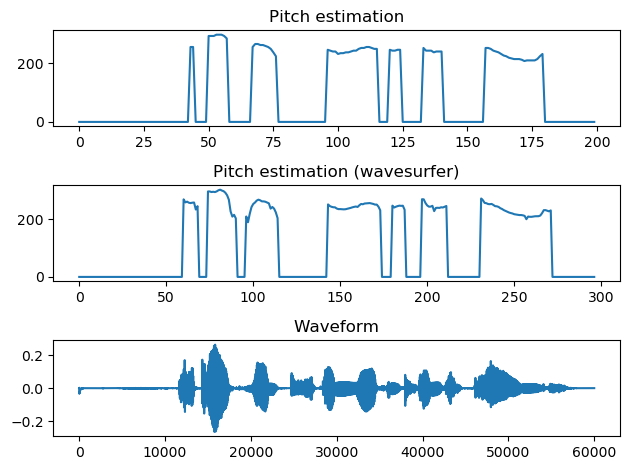

In [35]:
pitch_wavesurfer = loadtxt('../prueba.f0wavesurfer')

plt.figure()

plt.subplot(3, 1, 1)
plt.plot(pitch)
plt.title('Pitch estimation')

plt.subplot(3, 1, 2)
plt.plot(pitch_wavesurfer[:, 0])
plt.title('Pitch estimation (wavesurfer)')

plt.subplot(3, 1, 3)
plt.plot(wav_file)
plt.title('Waveform')

plt.tight_layout()
plt.show()